In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('dark')

# pre-processing and metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, f1_score
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier


In [2]:
# read the dataset
main_df = pd.read_csv('online_shoppers_intention (1).csv')
main_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
main_df.shape

(12330, 18)

In [4]:
df = main_df.copy()

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

## Discrete Numerical feature 
'Administrative', 'Informational', 'ProductRelated', 

## Continuous Numerical feature 
'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates in %', 'ExitRates in % ', 'PageValues', 'SpecialDay (probability)'

## Categorical Variable 
'Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'

## Traget variable 
'Revnue' is binary categorical 

All variables datatypes are correct and we dont have any typos/special charater in data and missing values.

In [6]:
# check for duplicate rows

df.duplicated().sum()

125

In [7]:
df.duplicated().sum() / len(df) * 100

1.013787510137875

 1 % data is duplicate

In [8]:
# check target variav=ble ctaegoiry counts before removing duplicate values

df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

True category has less data which will create bisaness in model. We will ecplore it more during imbalance data processing.

In [9]:
# check if True category in Revenue variable have duplicate values

df[df['Revenue']==True].duplicated().sum()

0

In [10]:
#remove duplicate values

df.drop_duplicates(inplace=True)

In [11]:
# target variable counts after removing data

df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [12]:
# variation of all variables

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
# Independent Variables have HIGH difference in variation. Feature scaling will be required.

In [14]:
# no. of unique values in each variables
df.nunique()

Administrative                27
Administrative_Duration     3335
Informational                 17
Informational_Duration      1258
ProductRelated               311
ProductRelated_Duration     9551
BounceRates in %            1872
ExitRates in %              4777
PageValues                  2704
SpecialDay (probability)       6
Month                         10
OperatingSystems               8
Browser                       13
Region                         9
TrafficType                   20
VisitorType                    3
Weekend                        2
Revenue                        2
dtype: int64

### Distribution of Dependent variable

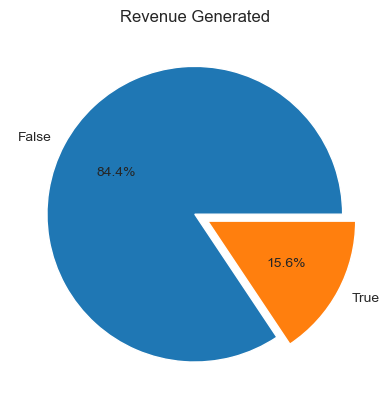

In [15]:
plt.pie(x = df.Revenue.value_counts(), labels = df.Revenue.value_counts().index, autopct='%.1f%%', explode=(0,0.1))
plt.title('Revenue Generated')
plt.show()

Only 15% of total visitors has generated Revenue. Dataset is highly imbalanced.

### Distribution of Pages and their Duration

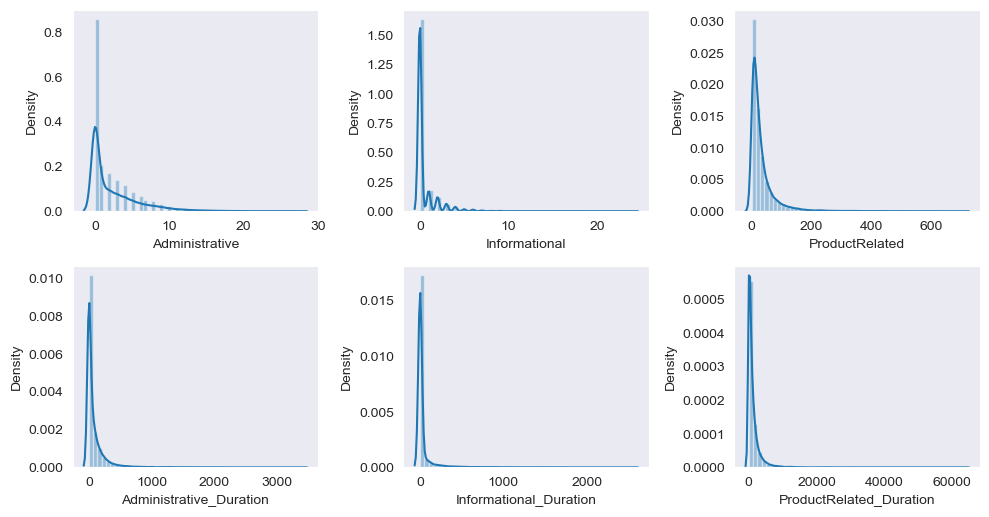

In [16]:
cols = ['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 
        'ProductRelated_Duration',]

plt.figure(figsize = (10,10))
for i, col in enumerate(cols, start=1):
        plt.subplot(4,3,i)
        sns.distplot(df[col])

plt.tight_layout()
plt.show()
        

- Most visitors have visited initial pages.
- Most visitors have visited for less duration.
- Data is not Normal distributed.


### Page Metrics Analysis

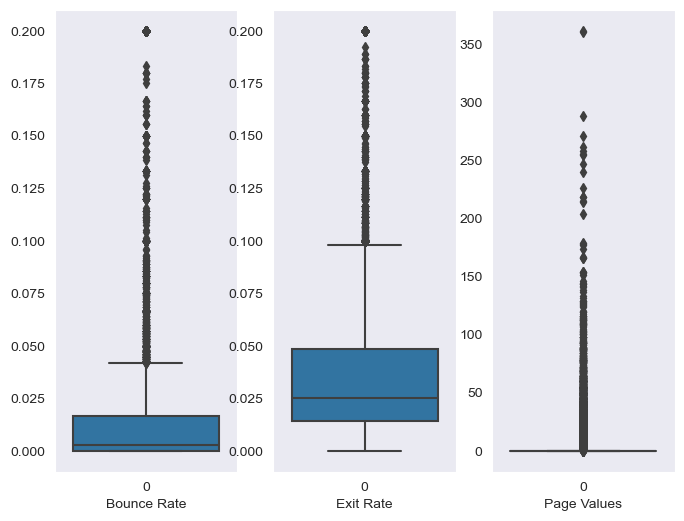

In [17]:
plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
sns.boxplot(df['BounceRates in %'])
plt.xlabel('Bounce Rate')
plt.subplot(1,3,2)
sns.boxplot(df['ExitRates in %'])
plt.xlabel('Exit Rate')
plt.subplot(1,3,3)
sns.boxplot(df['PageValues'])
plt.xlabel('Page Values')

plt.show()

- 75% data points, bounce rate are below .05, it means visitors are visiting multiple pages
- 50% data point of exit rate are below 0.05
- Data is right skewed and have outliers.
- The average Bounce and Exit rate is low which is good


# BiVariate Analysis


### Administrative vs [Administrative duration, BounceRates in %, ExitRates in %, PageValues]

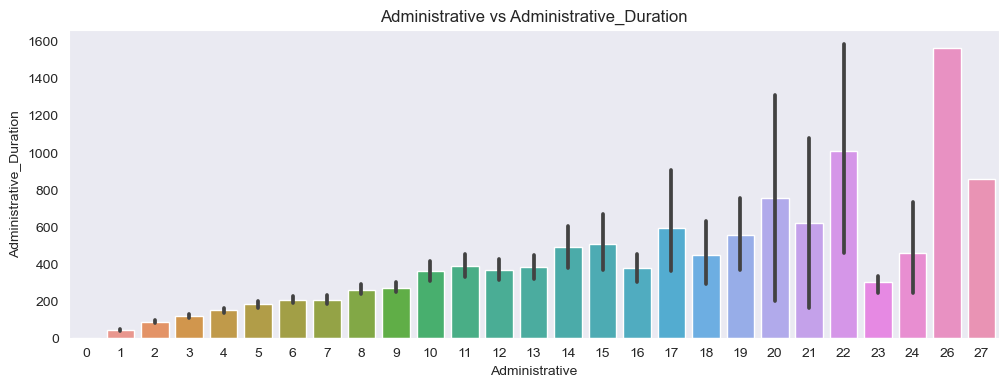

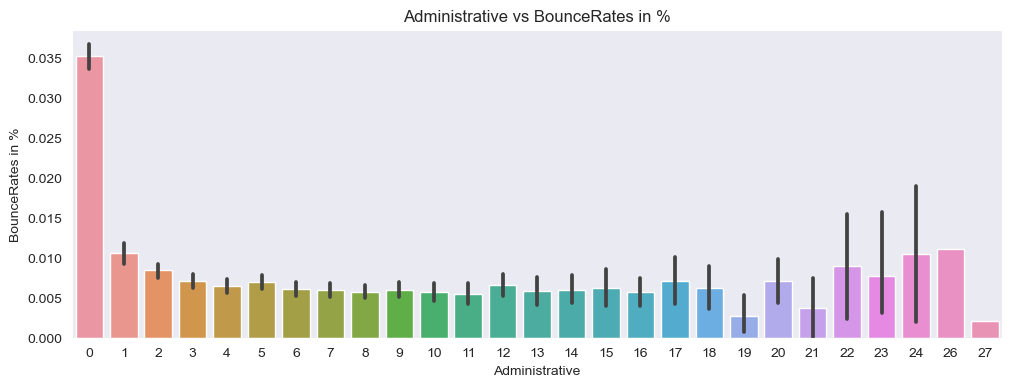

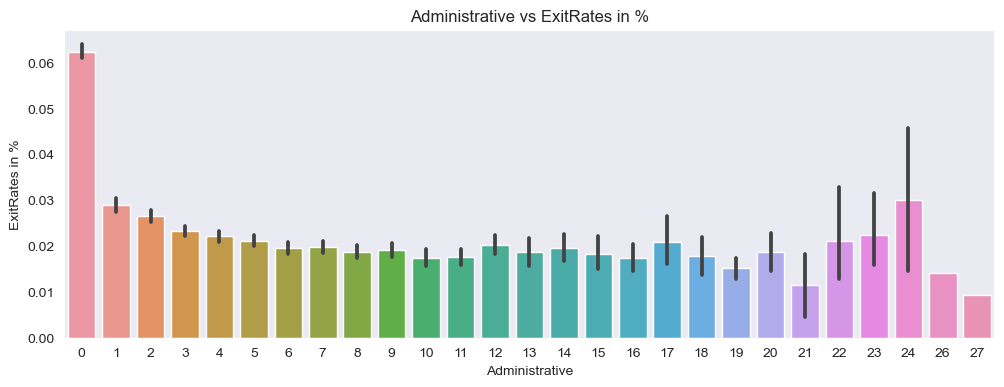

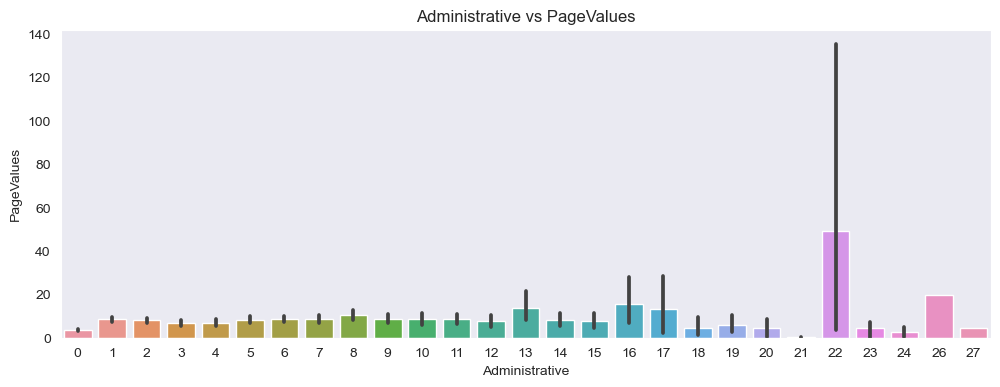

In [18]:
cols = ['Administrative_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues']

for col in cols:
    plt.figure(figsize=(12,4))
    sns.barplot(x='Administrative', y=col, data=df)
    plt.title(f'Administrative vs {col}')
    plt.show()

Observation :
1. Average spent time is increasing as Administrative page no. is increasing. Page 26, 22 and 27 are in Top 3.
2. Average Bounce rate is approx uniform. Those visitor who doesnt have visited any Administrative page bounce rate is high.
3. Average Exit rate is approx uniform. Those visitor who doesnt have visited any Administrative page exit rate is high.
4. Average Page value is high for page 22. rest pages have mostly uniform value.

### Informational vs [Informational duration, BounceRates in %, ExitRates in %, PageValues]


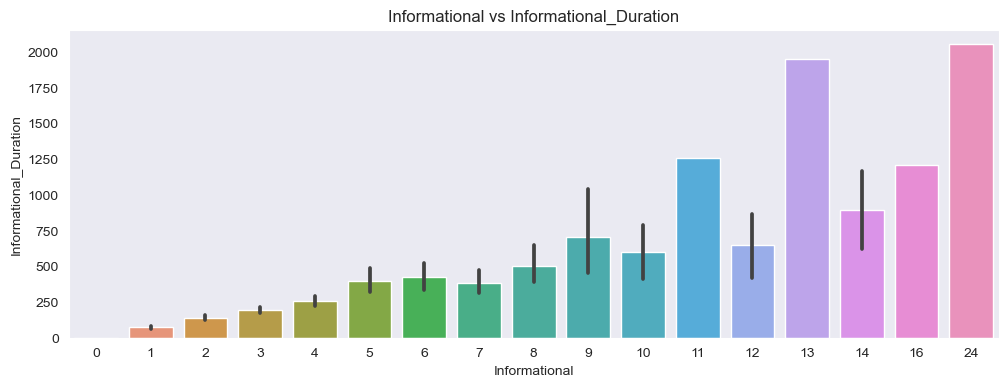

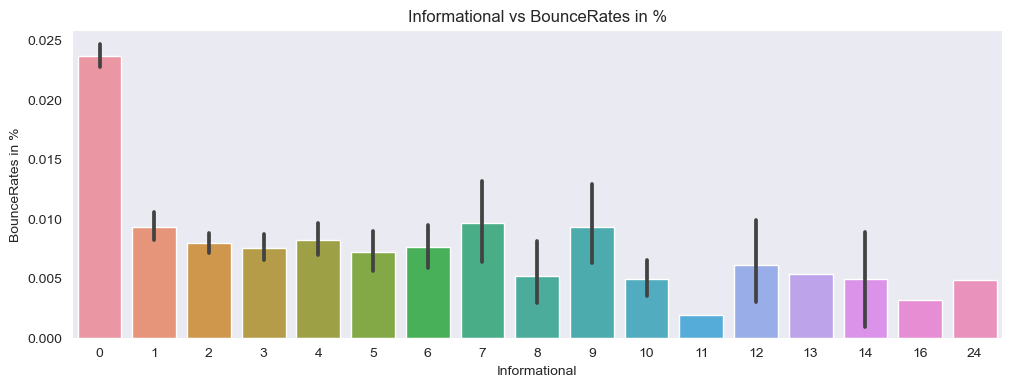

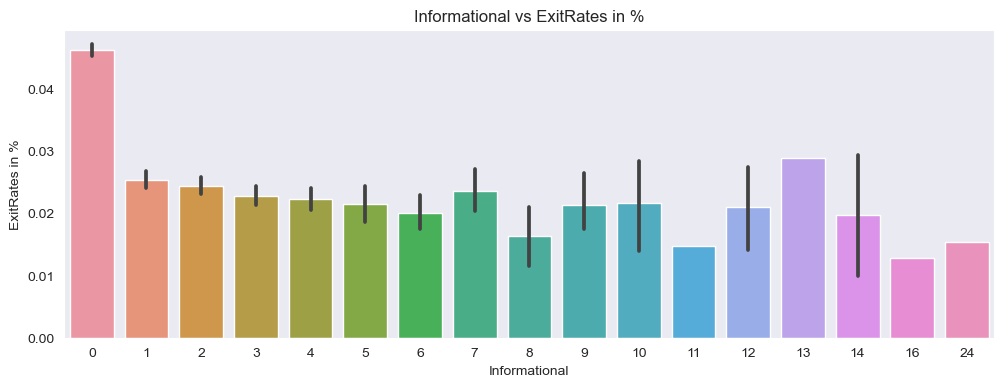

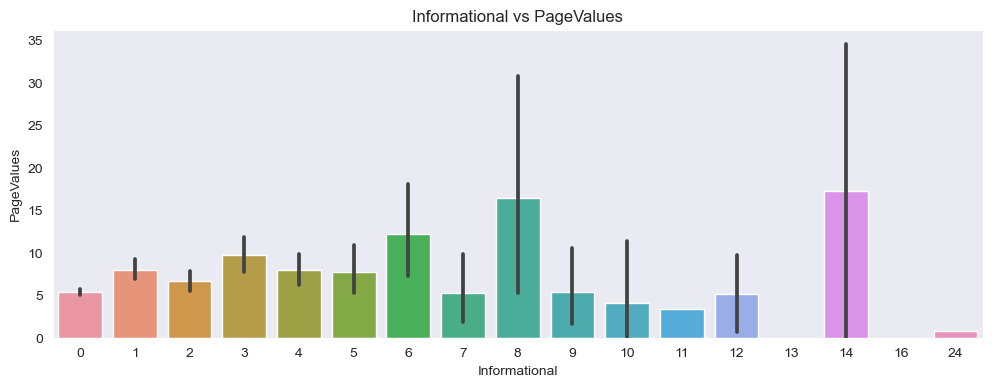

In [19]:
cols = ['Informational_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues']

for col in cols:
    plt.figure(figsize=(12,4))
    sns.barplot(x='Informational', y=col, data=df)
    plt.title(f'Informational vs {col}')
    plt.show()

Observation :
1. duration is increasing as page number is increasing. Top 3 pages are 24, 13 and 12.
2. Average Bounce rate is decreasing as the page number is increasing.
3. No clear relation.
4. Page value for page 14 and 8 is high among other pages.



### Top 25 ProductRelated vs [ProductRelated duration, BounceRates in %, ExitRates in %, PageValues]

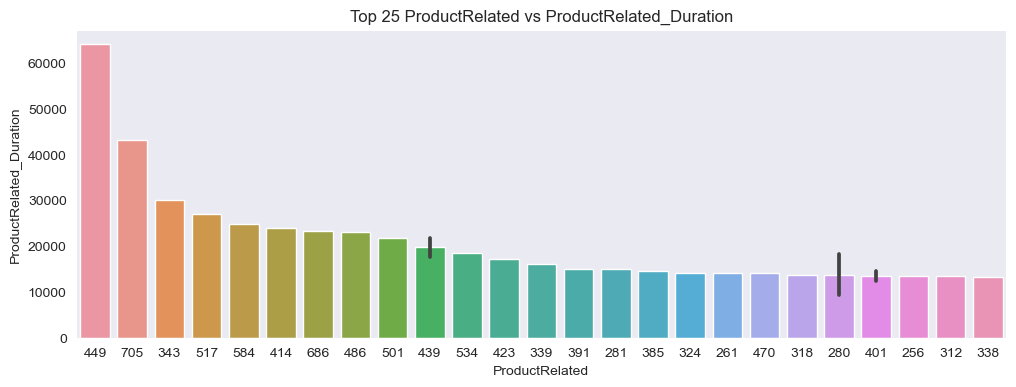

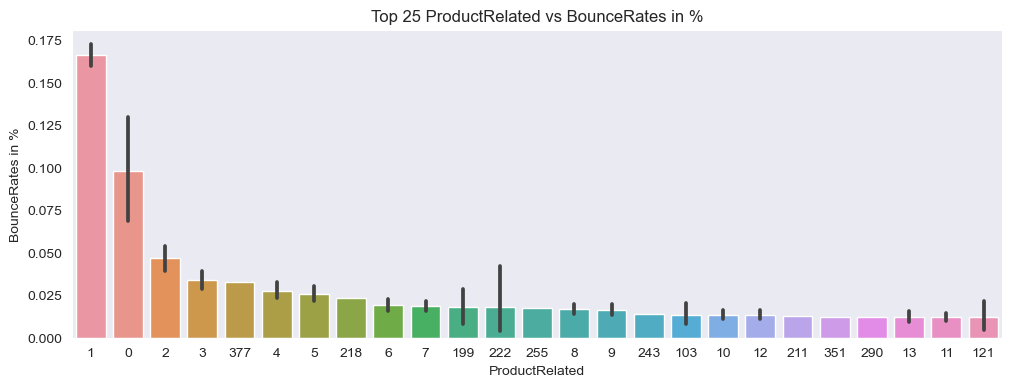

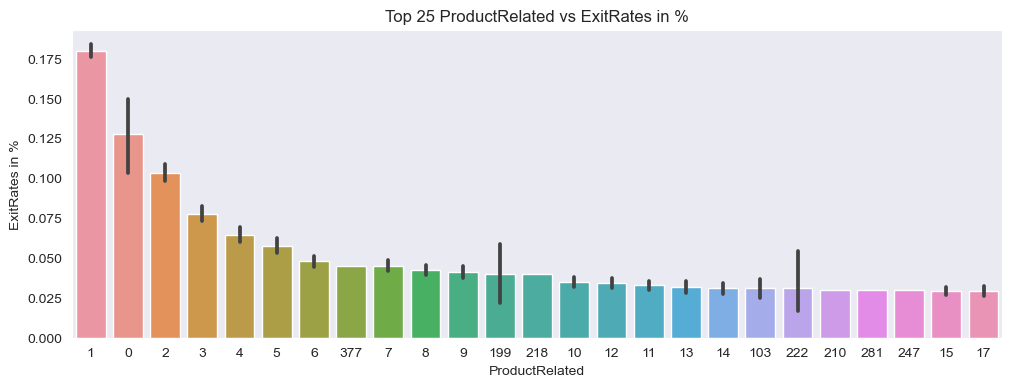

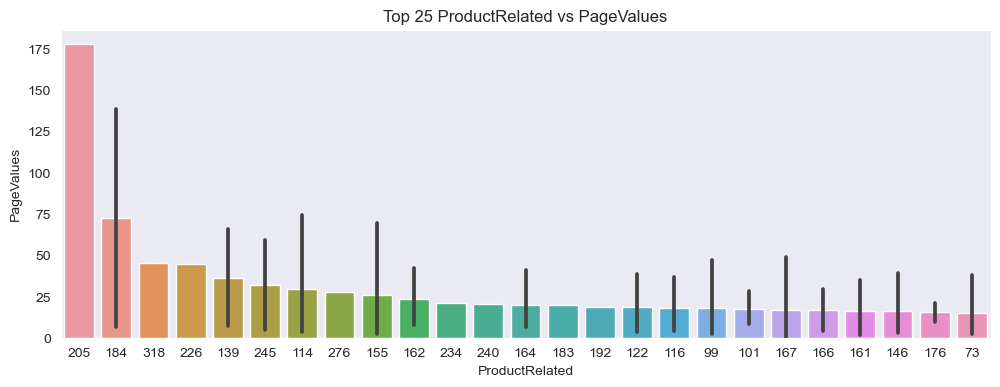

In [20]:
cols = ['ProductRelated_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues']

for col in cols:
    plt.figure(figsize=(12,4))
    df1 = df.groupby(by='ProductRelated').mean()[col].sort_values(ascending=False).iloc[:25]
    sns.barplot(x='ProductRelated', y=col, data=df, order=df1.index)
    plt.title(f'Top 25 ProductRelated vs {col}')
    plt.show()

Observation :
1. Time Spent on Product pages are much higher than Admin or informational pages. 
2. Product Page 449, 705 and 343 are in Top 3 for most time spent.
3. Top 3 average Bounce rate pages are initial pages 1, 2 and 3.
4. Top 3 average Exit rate pages are initial pages 1, 2 and 3.
5. Product page 205 has the highest Page value.

Recommendation :
1. Optimize page 1, 2 and 3.

### Bottom 25 ProductRelated vs[ProductRelated duration, BounceRates in %, ExitRates in %, PageValues]

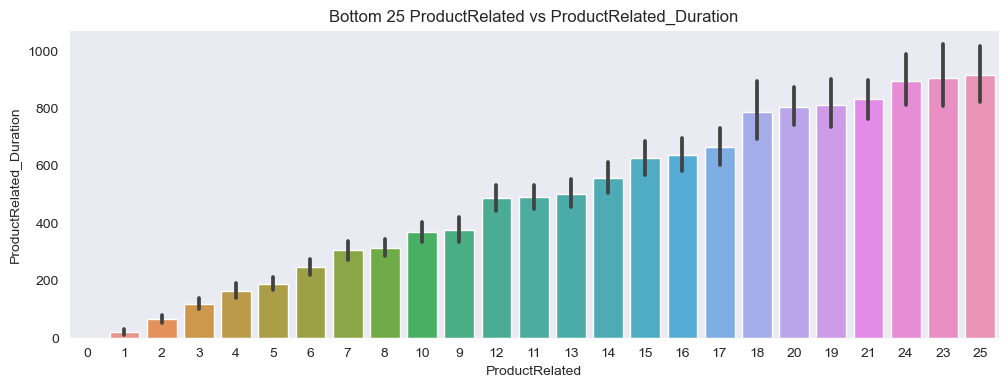

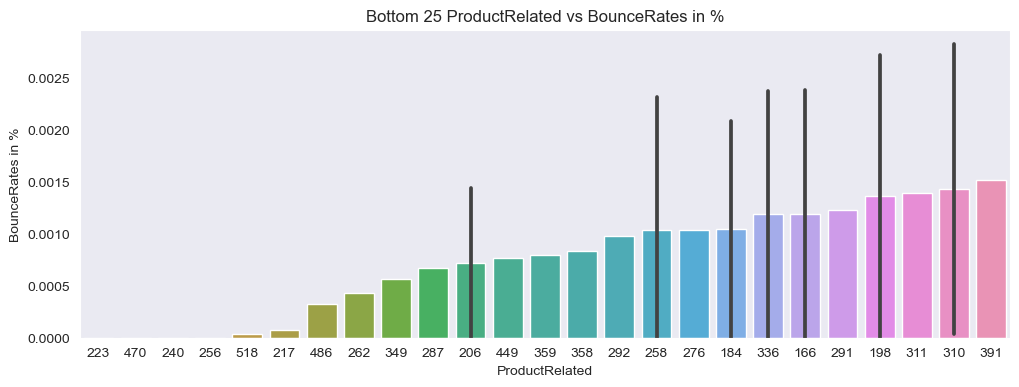

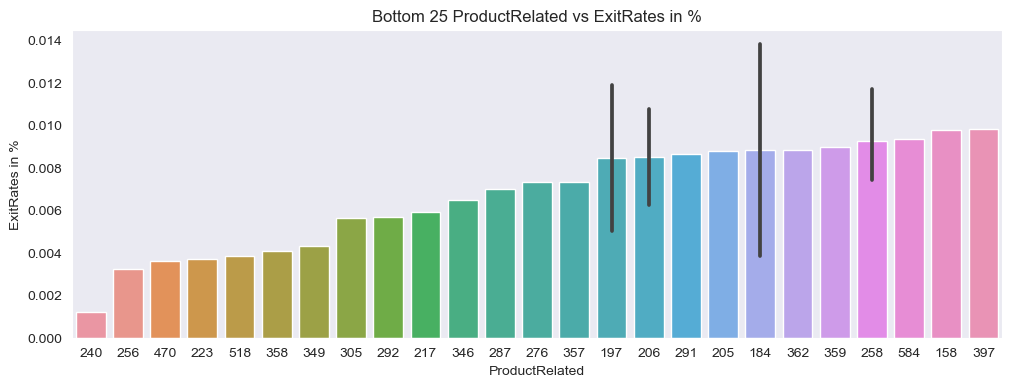

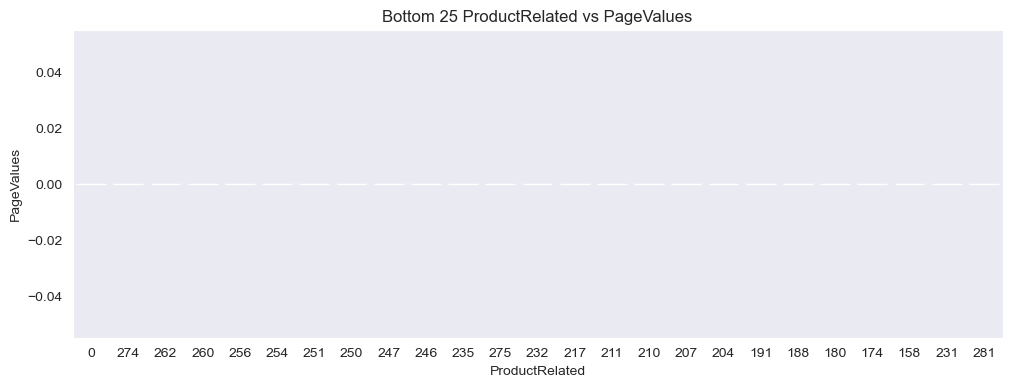

In [21]:
cols = ['ProductRelated_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues']

for col in cols:
    plt.figure(figsize=(12,4))
    df1 = df.groupby(by='ProductRelated').mean()[col].sort_values().iloc[:25]
    sns.barplot(x='ProductRelated', y=col, data=df, order=df1.index)
    plt.title(f'Bottom 25 ProductRelated vs {col}')
    plt.show()

Observation :
1. Pages 1,2 and 3 have the least spent duration and from previous chart we have they high bounce and exit rate.
2. Page 223, 470, 240 and 256 have almost zero bounce rate.
3. Page 240 have the least exit rate.
4. we have some pages which have zero values.

Recommendation :
1. Improve Page 1, 2, and 3
3. Compare highest Bounce rate Pages with zero Bounce rate pages to analyze
2. Product Page 240 is also in Top 25 PageValue. This product is ideal to sell.
4. Check how many product pages have zero page value.

In [22]:
df1 = df[['ProductRelated','ProductRelated_Duration', 'PageValues']].groupby(by='ProductRelated').sum()
df1[df1.PageValues == 0].T

ProductRelated,0,144,158,174,180,188,191,204,207,210,...,340,343,358,362,377,378,385,449,486,518
ProductRelated_Duration,0.0,15870.361389,2110.255093,14083.213338,11285.34659,14346.705483,3677.258176,14353.256075,5160.451362,8115.845852,...,10902.45826,29970.46597,9760.690488,13259.29396,11729.40804,12003.31758,14505.72725,63973.52223,23050.10414,11976.72135
PageValues,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


These 47 product pages have generated zero revenue inspite of having visitors.

## Categorical Features Distribution

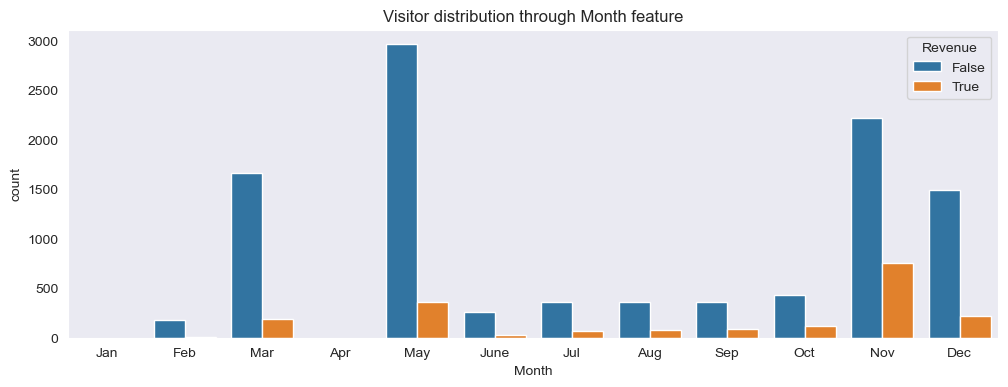

In [23]:
plt.figure(figsize=(12,4),)
orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(x='Month', hue="Revenue", data=df, order=orderlist)
plt.title('Visitor distribution through Month feature')
plt.show()

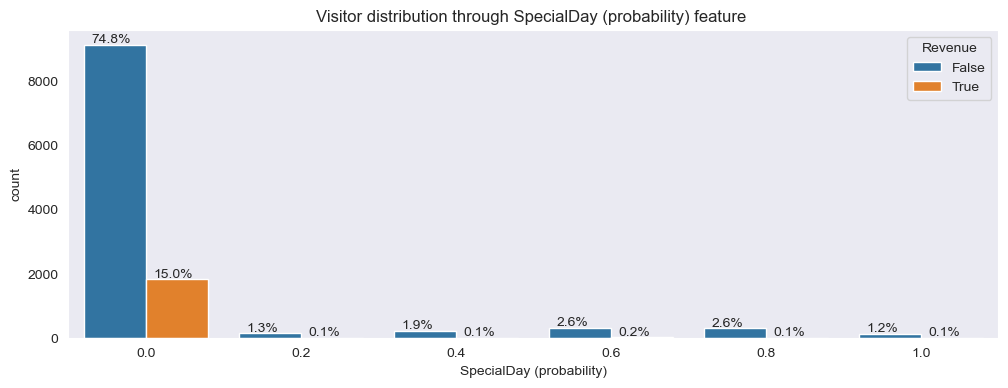

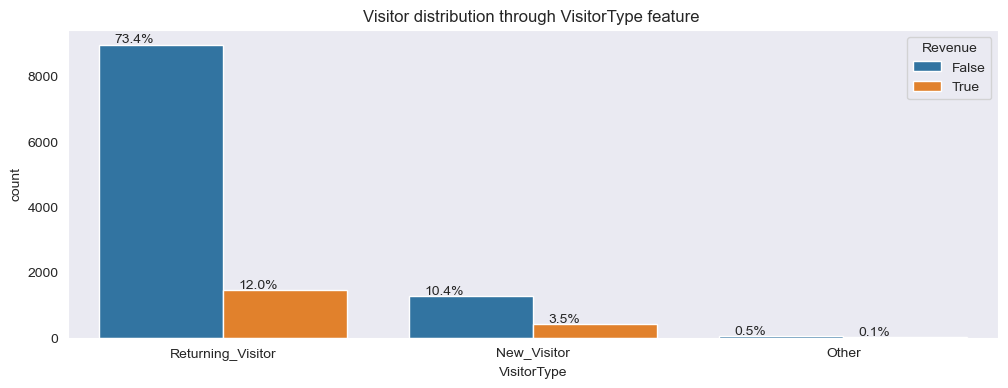

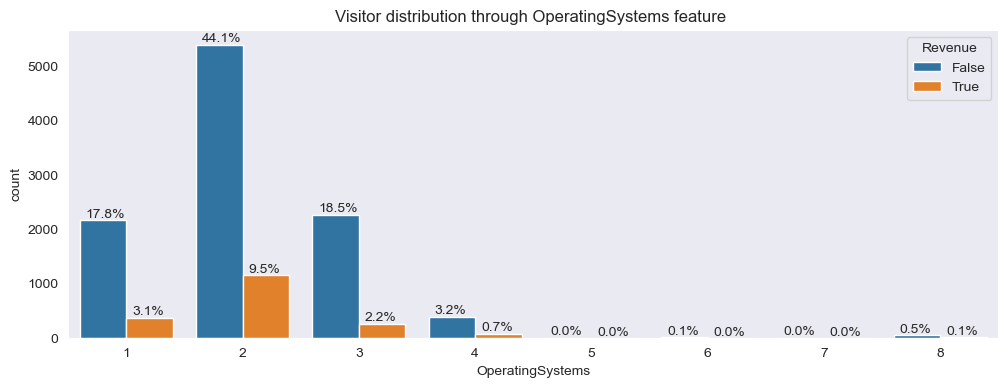

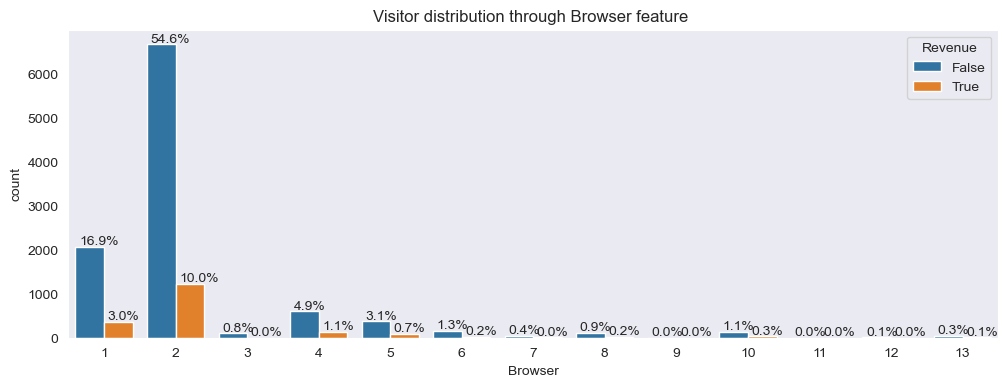

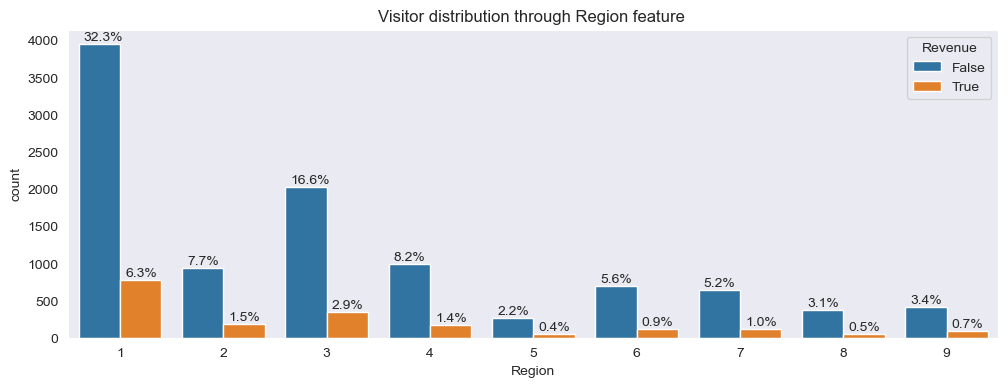

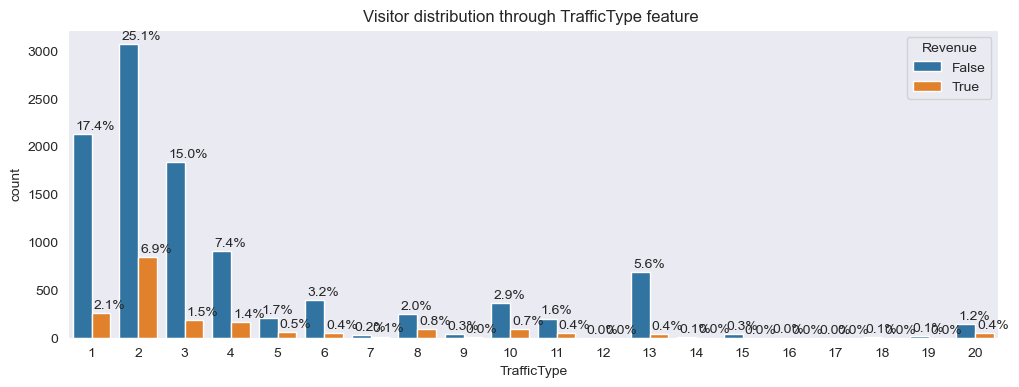

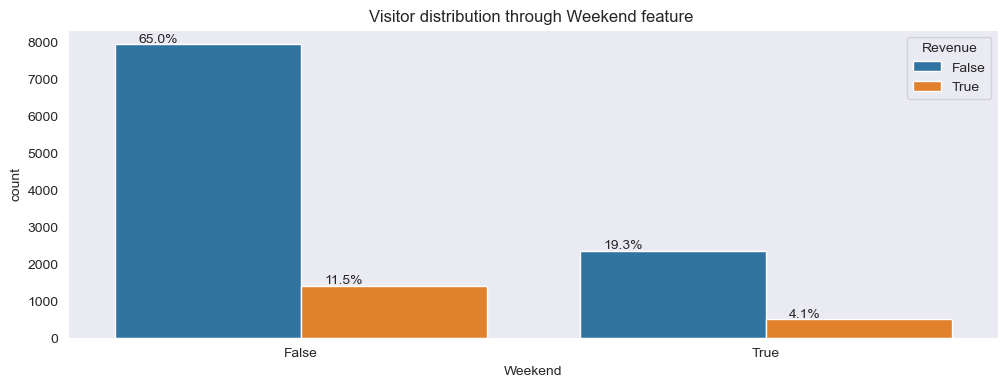

In [24]:
cols = ['SpecialDay (probability)', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']

for col in cols:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x = col, hue='Revenue', data=df)
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(df)*100,1)}%', (p.get_x() + 0.05, p.get_height() + 50))
    plt.title(f'Visitor distribution through {col} feature ')
    plt.show()
        

Obersvation :
- 90% visitors came on normal days.
- 80% vistors are coming in Top 4 months May, Nov, Mar and Dec. It may be because of festival sale and zero visitors in Jan and Apr.
- Returning visitor type is 85%, which is a good thing
- 95% visitors used operating system 1,2 and 3
- 85% visitors are using browser 1 and 2
- 83% of visitors are from top 5 regions 1,3,4,2 and 6
- 82% visitors came from Top 5 Traffic type 1,2,3,4 and 13
- only 23% visitors are on weekend, so website is approx equally visited irrespective of days.

Recommendation :
- to increase visitors in other months, we can provide deals and offers curated for that month.
- New visitors are 14%, we should provide cashback coupons for next purchase to these visitors.
- optimize website for Top 3 operating system and browser as most of visitors are using them.
- we can target the visitors top 5 regions with offers and analyze why people from other region are not visiting.
- Increase investment in Top 5 Traffic type.
- to increase visitors on weeekends, we can have weekend specific sales and offer.

# Multivariate Analysis

### Linear corelation

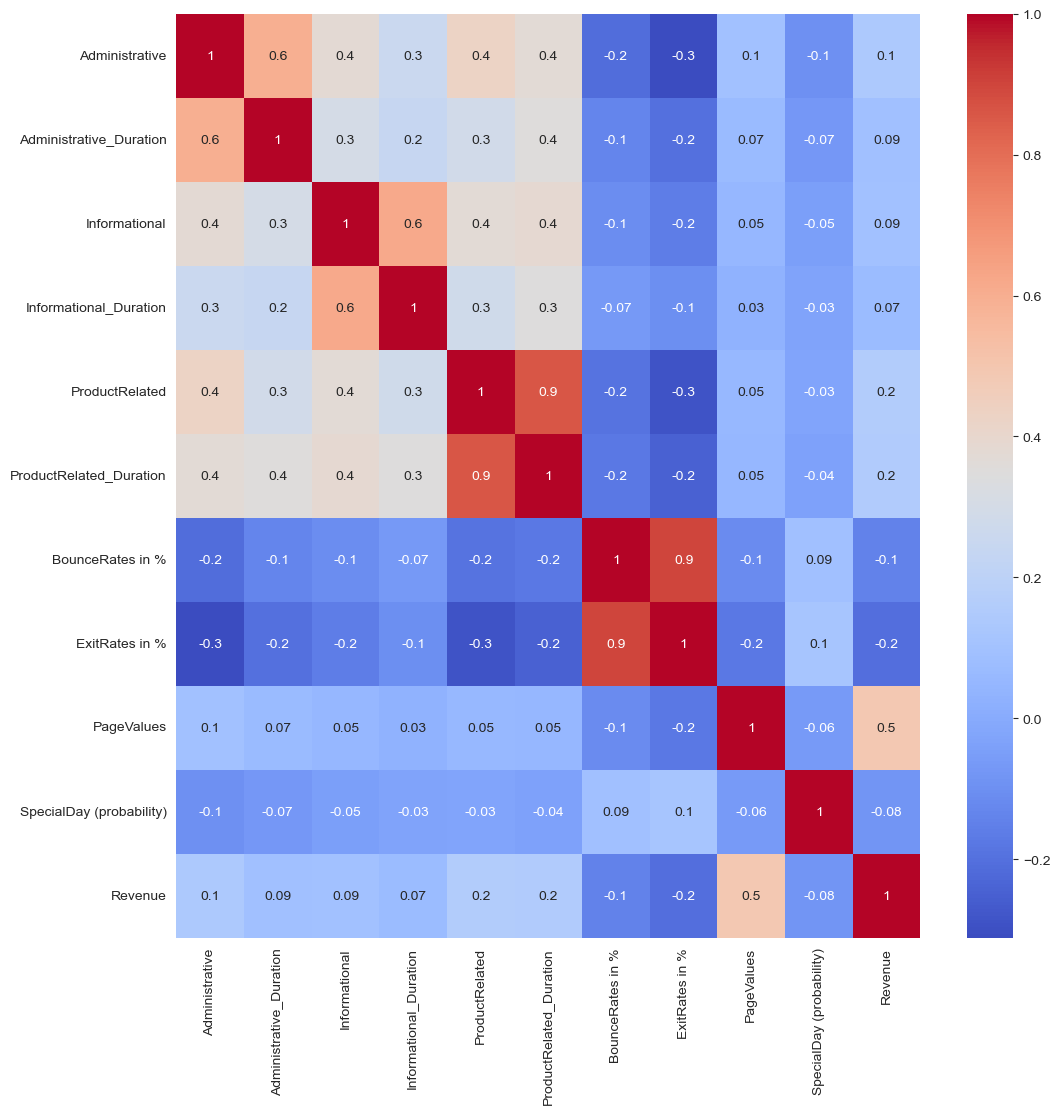

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'], axis=1).corr(method='pearson'), cmap='coolwarm', annot=True, fmt='.1g')
plt.show()

Observation :
- high linear correlation |corr| >= 0.7 : 
    - BounceRates & ExitRates (0.9). 
    - ProductRelated & ProductRelated_Duration (0.9).
- Moderate linear Correlations 0.3 < |corr| < 0.7 : 
    - in between following features: Administrative, Administrative_Duration, Informational, Informational_Duration,  
      ProductRelated, and ProductRelated_Duration. 
    - Also PageValues and Revenue. 


### Page Value vs Revenue vs [Special Day, Month, Visitor Type, Weekend, Operating Systems, Browser, Region, Traffic Type]

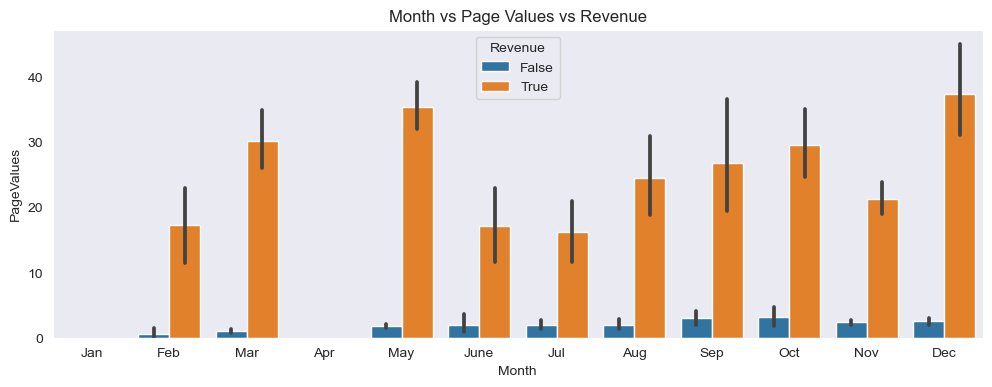

In [26]:
plt.figure(figsize=(12,4),)
orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.barplot(x='Month', y='PageValues', hue="Revenue", data=df, order=orderlist)
plt.title('Month vs Page Values vs Revenue')
plt.show()

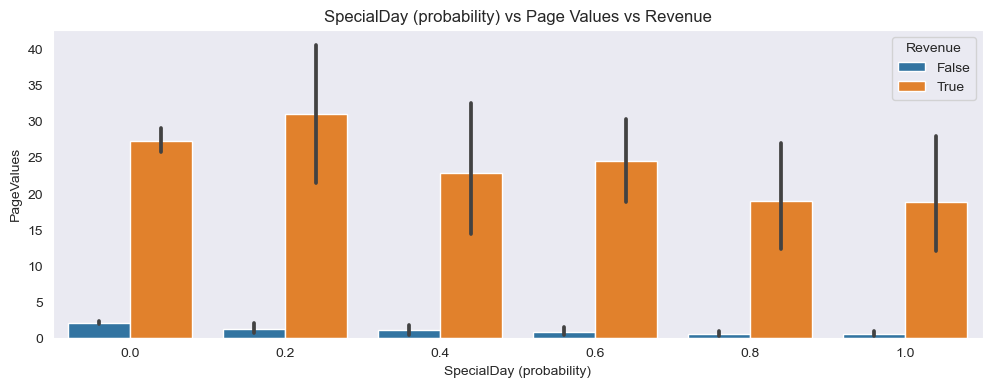

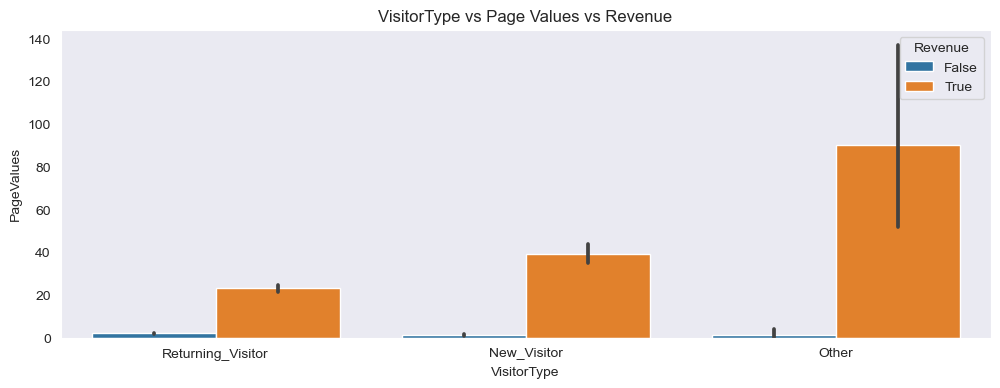

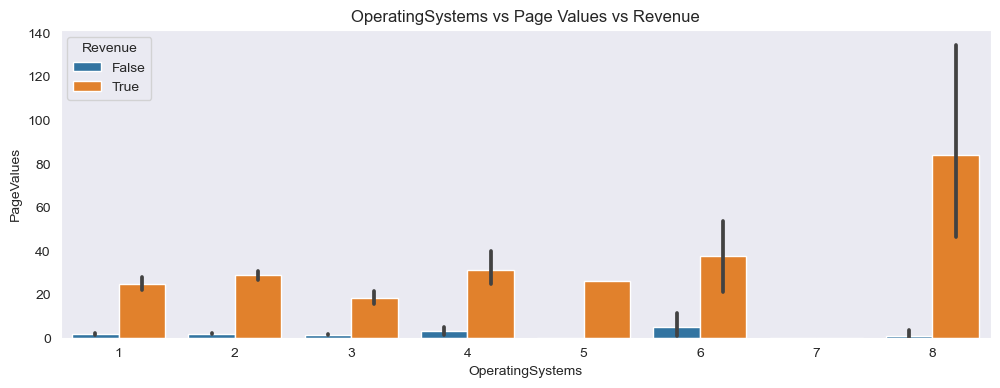

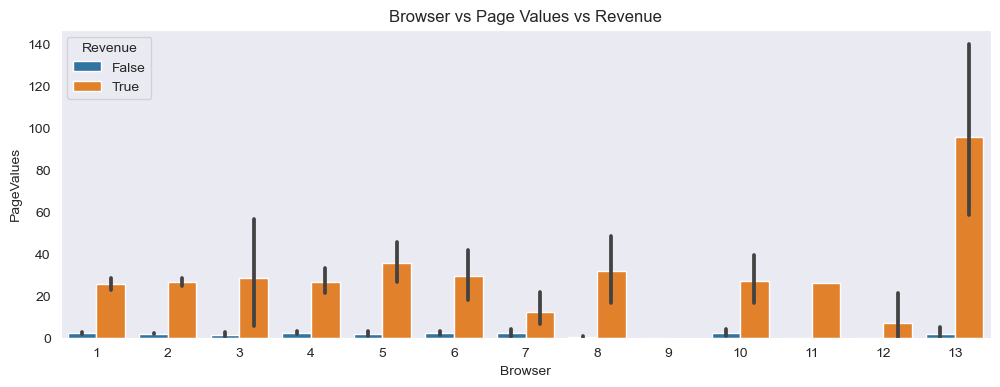

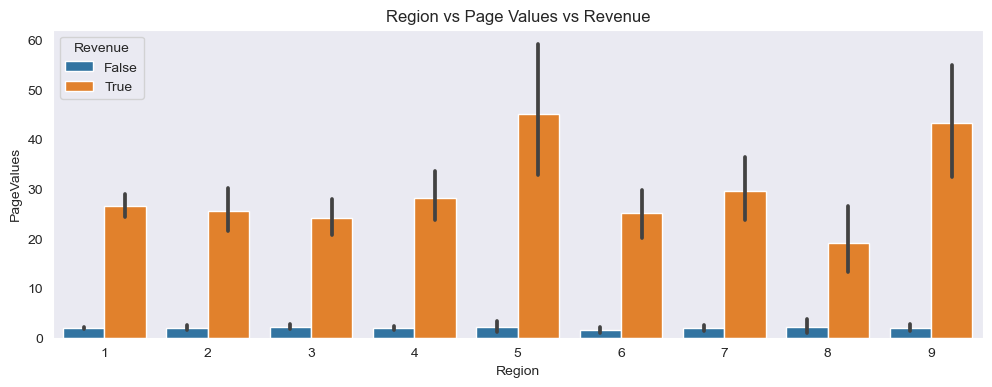

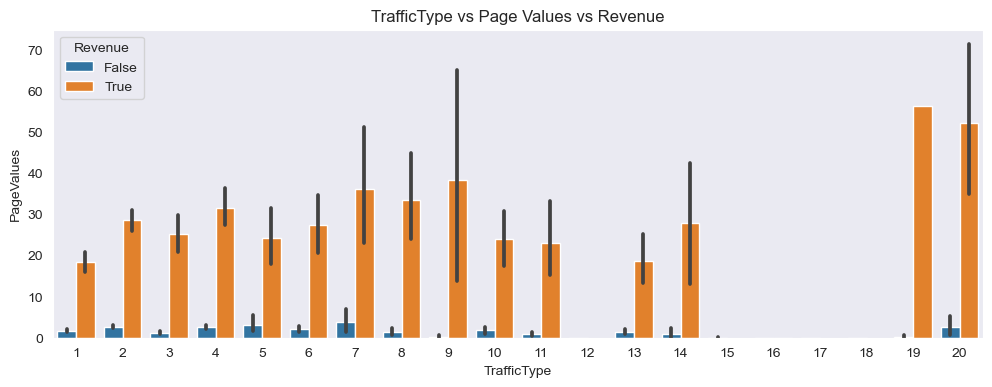

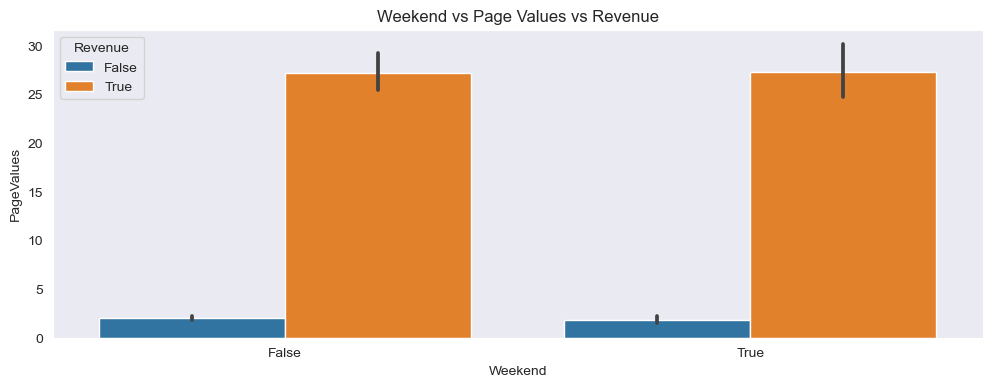

In [27]:
cols = ['SpecialDay (probability)', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']

for col in cols:
    plt.figure(figsize=(12,4),)
    sns.barplot(x=col, y='PageValues', hue="Revenue", data=df)
    plt.title(f'{col} vs Page Values vs Revenue')
    plt.show()

Observation :
   1. combined special days revenue is greater than normal days revenue.
   2. Dec, May, Mar, Oct among top contributor to revenue. Jan and Apr has zero contribution.
   3. Other type visitor has max revenue and returning visitor has least.
   4. 8 type operating system visitor have max contribution and 7 type has least.
   5. 13 no. Browser has most contribution and 9 has least. otherwise for other browser revenue is almost uniform.
   6. People from region 5 and 9 has top revenue generation for other region it is amlost uniform.
   7. 19 and 20 traffic type generating most revenue on the other hand traffic from 12, 15, 16,17 and 18 are not generating.
   8. weekdays and Weekend revenue is almost same.

## Visitor Type Analysis

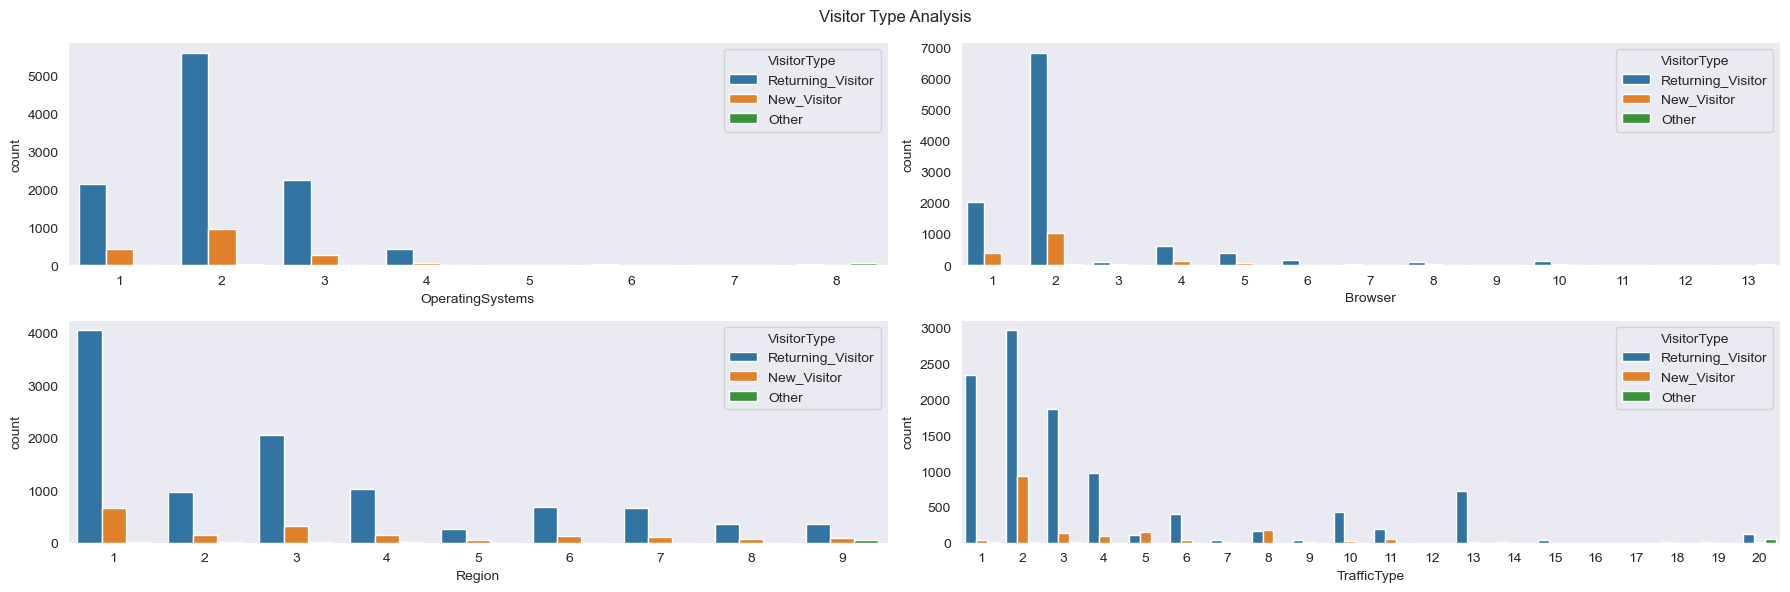

In [28]:
fig = plt.figure(figsize=(18, 6))

fig.add_subplot(2, 2, 1)
sns.countplot(data=df, x='OperatingSystems', hue='VisitorType')

fig.add_subplot(2, 2, 2)
sns.countplot(data=df, x='Browser', hue='VisitorType')

fig.add_subplot(2, 2, 3)
sns.countplot(data=df, x='Region', hue='VisitorType')

fig.add_subplot(2, 2, 4)
sns.countplot(data=df, x='TrafficType', hue='VisitorType')

fig.suptitle('Visitor Type Analysis')
plt.tight_layout()
plt.show()

- Most New Visitor are using operating system no. 2.
- Most New Visitor are using browser no. 2.
- Most New Visitor are coming from Region 1.
- Traffic Type 2 is successful in getting New Visitors.

# Data Preprocessing

In [29]:
# Data dont have missing values

In [30]:
# Data do have ouliers but for classification problem outlier treatment is not required.

### Label Encoding

In [31]:
# convert feature 'Weekend' and target 'Revenue' from Boolean to Binary 

df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [32]:
# One Hot encoding for feature 'Month' and "VisitorType"

pd.options.display.max_columns=50

df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,1


In [33]:
df.shape

(12205, 27)

### Data Split

In [34]:
x = df.drop('Revenue', axis=1)
y = df.Revenue

In [35]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,1,0,0,0,0,0,0,0,0,1


In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int32

### Imbalance Data balancing

In [37]:
smote = SMOTE()

x_os, y_os = smote.fit_resample(x,y)

y_os.value_counts()

0    10297
1    10297
Name: Revenue, dtype: int64

In [38]:
x_os.duplicated().sum()

2

### Train Test Split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.25, random_state=101)

In [40]:
print(x_train.shape, y_train.shape)

(15445, 26) (15445,)


In [41]:
print(x_test.shape, y_test.shape)

(5149, 26) (5149,)


## Feature Scaling

In [42]:
sc = StandardScaler()

xs_train = sc.fit_transform(x_train)
xs_test = sc.transform(x_test)

# Model Building

## Logistic Regression

In [43]:
lr = LogisticRegression() #default parameter

lr.fit(x_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, lr.predict(x_train)))
print('###'*40)
print('Test data Classification report :\n', classification_report(y_test, lr.predict(x_test)))



 Train data Classification report :
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      7641
           1       0.89      0.75      0.82      7804

    accuracy                           0.83     15445
   macro avg       0.84      0.83      0.83     15445
weighted avg       0.84      0.83      0.83     15445

########################################################################################################################
Test data Classification report :
               precision    recall  f1-score   support

           0       0.79      0.91      0.84      2656
           1       0.88      0.74      0.80      2493

    accuracy                           0.83      5149
   macro avg       0.84      0.82      0.82      5149
weighted avg       0.83      0.83      0.82      5149



Logistic Regression Performance
- Test and train data result are almost same.

Type 2 Error will be critical here. Means classifying a revenue generating customer as non revenue.

To reduce Type 2 error we have to increase recall value.

In [44]:
# Logistic regression Test data Perfomance :
# Accuracy : 0.84
# F1 Score : 0.82
# Precision : 0.88
# Recall : 0.77

## KNN

In [45]:
# for KNN we will be using scaled dataset

knn = KNeighborsClassifier(n_neighbors=5) # deafult parameter

knn.fit(xs_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, knn.predict(xs_train)))
print('###'*40)
print('Test data Classification report :\n', classification_report(y_test, knn.predict(xs_test)))

 Train data Classification report :
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7641
           1       0.91      0.92      0.92      7804

    accuracy                           0.91     15445
   macro avg       0.91      0.91      0.91     15445
weighted avg       0.91      0.91      0.91     15445

########################################################################################################################
Test data Classification report :
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2656
           1       0.88      0.88      0.88      2493

    accuracy                           0.88      5149
   macro avg       0.88      0.88      0.88      5149
weighted avg       0.88      0.88      0.88      5149



### Optimal Value for K

Text(0.5, 0, 'K value')

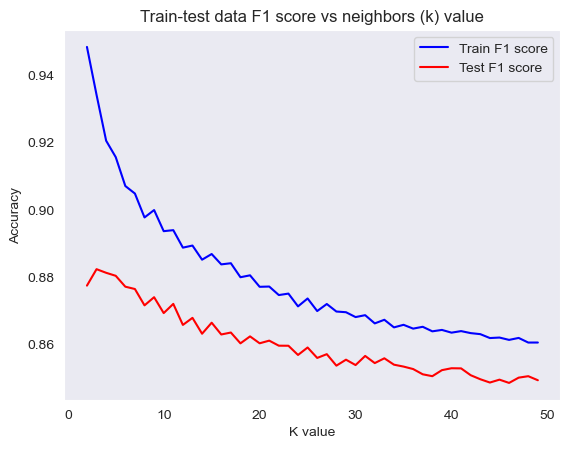

In [46]:
f1_test = []
f1_train = []
for i in range(2,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xs_train, y_train)
    
    f1_train.append(f1_score(y_train, knn.predict(xs_train)))
    f1_test.append(f1_score(y_test, knn.predict(xs_test)))
    
plt.plot(range(2,50), f1_train, c='blue', label = 'Train F1 score')
plt.plot(range(2,50), f1_test, c='red', label = 'Test F1 score')
plt.title('Train-test data F1 score vs neighbors (k) value')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('K value')

Optimal value for k is 5.

In [47]:
# K-Nearest Neighbour Test data Perfomance :
# Accuracy : 0.88
# F1 Score : 0.0.88
# Precision : 0.87
# Recall : 0.88

KNN model performance is better than Logistic Regression.

## Naive Bayes

In [48]:

nb = GaussianNB()

nb.fit(xs_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, nb.predict(xs_train)))
print('###'*40)
print('Test data Classification report :\n', classification_report(y_test, nb.predict(xs_test)))

 Train data Classification report :
               precision    recall  f1-score   support

           0       0.88      0.64      0.74      7641
           1       0.72      0.91      0.80      7804

    accuracy                           0.78     15445
   macro avg       0.80      0.77      0.77     15445
weighted avg       0.80      0.78      0.77     15445

########################################################################################################################
Test data Classification report :
               precision    recall  f1-score   support

           0       0.89      0.66      0.75      2656
           1       0.71      0.91      0.80      2493

    accuracy                           0.78      5149
   macro avg       0.80      0.78      0.78      5149
weighted avg       0.80      0.78      0.78      5149



In [49]:
# Naive Bayes Test data Perfomance :
# Accuracy : 0.78
# F1 Score : 0.80
# Precision : 0.71
# Recall : 0.91

Naive Bayes model performance is lower than Logistic Regression and KNN model but it have high recall value.

## SVM

In [50]:
svm = SVC(kernel='rbf') # default parameter

svm.fit(xs_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, svm.predict(xs_train)))
print('###'*40)
print('Test data Classification report :\n', classification_report(y_test, svm.predict(xs_test)))

 Train data Classification report :
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7641
           1       0.92      0.90      0.91      7804

    accuracy                           0.91     15445
   macro avg       0.91      0.91      0.91     15445
weighted avg       0.91      0.91      0.91     15445

########################################################################################################################
Test data Classification report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2656
           1       0.90      0.88      0.89      2493

    accuracy                           0.90      5149
   macro avg       0.90      0.90      0.90      5149
weighted avg       0.90      0.90      0.90      5149



In [51]:
# SVM Test data Perfomance :
# Accuracy : 0.9
# F1 Score : 0.89
# Precision : 0.9
# Recall : 0.88

SVM has highest performance out of LR, NB and KNN.

## Decision Tree

In [52]:
dt = DecisionTreeClassifier(random_state=101)

dt.fit(x_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, dt.predict(x_train)))
print('###'*40)
print('Test data Classification report :\n', classification_report(y_test, dt.predict(x_test)))

 Train data Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7641
           1       1.00      1.00      1.00      7804

    accuracy                           1.00     15445
   macro avg       1.00      1.00      1.00     15445
weighted avg       1.00      1.00      1.00     15445

########################################################################################################################
Test data Classification report :
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      2656
           1       0.89      0.91      0.90      2493

    accuracy                           0.90      5149
   macro avg       0.90      0.90      0.90      5149
weighted avg       0.90      0.90      0.90      5149



In [53]:
# Decison Tree Test data Perfomance :
# Accuracy : 0.89
# F1 Score : 0.89
# Precision : 0.88
# Recall : 0.90

Decision overfitted on train dataset.

## Random Forest

In [1]:
rf = RandomForestClassifier(random_state=101) # default parameter

rf.fit(x_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, rf.predict(x_train)))
print('###'*30)
print('Test data Classification report :\n', classification_report(y_test, rf.predict(x_test)))

NameError: name 'RandomForestClassifier' is not defined

Random forest has better report than previous models.

In [55]:
# Random Forest Test data Perfomance :
# Accuracy : 0.93
# F1 Score : 0.93
# Precision : 0.92
# Recall : 0.93


# Gradient Boost

In [56]:
# boosting models are best to reduce high variance.

gbm = GradientBoostingClassifier(random_state=101) # default parameter

gbm.fit(x_train, y_train)

print(' Train data Classification report :\n', classification_report(y_train, gbm.predict(x_train)))
print('###'*40)
print('Test data Classification report :\n', classification_report(y_test, gbm.predict(x_test)))

 Train data Classification report :
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      7641
           1       0.93      0.92      0.92      7804

    accuracy                           0.92     15445
   macro avg       0.92      0.92      0.92     15445
weighted avg       0.92      0.92      0.92     15445

########################################################################################################################
Test data Classification report :
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2656
           1       0.91      0.90      0.90      2493

    accuracy                           0.91      5149
   macro avg       0.91      0.91      0.91      5149
weighted avg       0.91      0.91      0.91      5149



In [57]:
# Gradient Boost Test data Performance
# Accuracy : .91
# Precision : .91
# Recall : .91
# F1 score : .91

## Models Result

Here are the classification performance measures for the 7 different classification modelss tested: 

| Classifier | Accuracy | F1-Score | Precision | Recall |
|:-----------|:---------|:---------|:----------|:-------|
|Logistic Regression|0.84|0.82|0.88|0.77|
|KNN|0.88|0.88|0.87|0.88|
|Naive Bayes |0.78|0.8|0.71|0.91
|SVM|0.9|0.89|0.9|0.88|
|Decision Tree|0.89|0.89|0.88|0.90|
|Random Forest|0.93|0.93|0.92|0.93|
|Gradient Boost|0.91|0.91|0.91|0.91|

Out of 7 models Random Forest model has high f1 score.

# ROC Curves

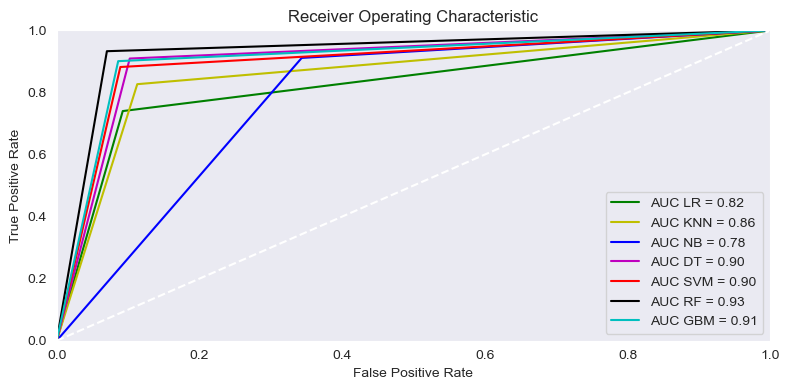

In [58]:
# logistic regression model
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, lr.predict(x_test))
roc_auc_lr = auc(fpr_lr, tpr_lr)

# KNN model
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, knn.predict(xs_test))
roc_auc_knn = auc(fpr_knn, tpr_knn)
 
# Naive Bayes Model
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, nb.predict(xs_test))
roc_auc_nb = auc(fpr_nb, tpr_nb)

# SVM Model
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, svm.predict(xs_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Decision Tree Model
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, dt.predict(x_test))
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random forest  Model
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf.predict(x_test))
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting Model
fpr_gbm, tpr_gbm, threshold_gbm = roc_curve(y_test, gbm.predict(x_test))
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'g', label = f'AUC LR = {roc_auc_lr:.2f}')
plt.plot(fpr_knn, tpr_knn, 'y', label = f'AUC KNN = {roc_auc_knn:.2f}')
plt.plot(fpr_nb, tpr_nb, 'b', label = f'AUC NB = {roc_auc_nb:.2f}')
plt.plot(fpr_dt, tpr_dt, 'm', label = f'AUC DT = {roc_auc_dt:.2f}')
plt.plot(fpr_svm, tpr_svm, 'r', label = f'AUC SVM = {roc_auc_svm:.2f}')
plt.plot(fpr_rf, tpr_rf, 'k', label = f'AUC RF = {roc_auc_rf:.2f}')
plt.plot(fpr_gbm, tpr_gbm, 'c', label = f'AUC GBM = {roc_auc_gbm:.2f}')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

Random Forest model performance is best out of all Model.

## Feature Importance

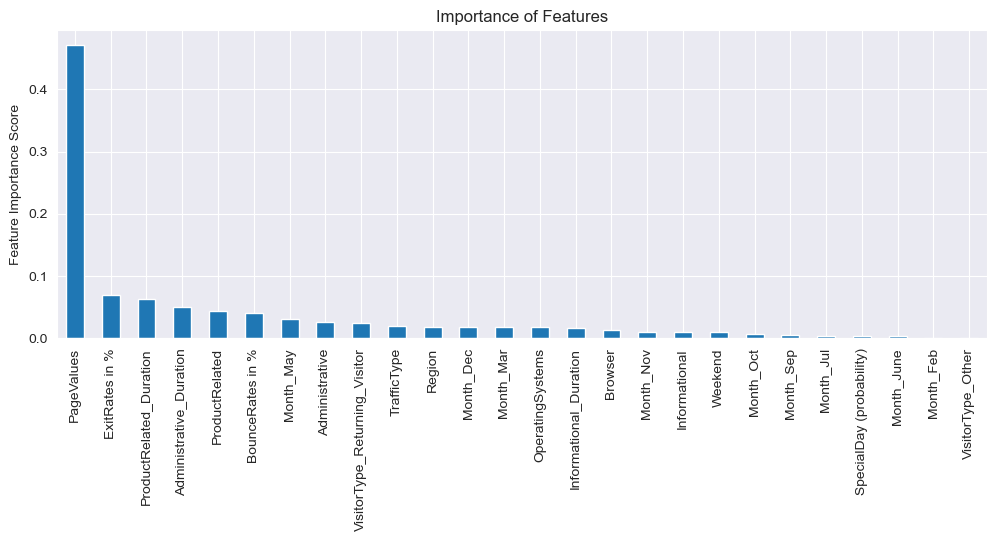

In [59]:
feat_imp = pd.Series(rf.feature_importances_, rf.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

PageValues feature has highest importance because it has moderate relation with Revenue.

# Conclusion

In this project, we used ‘Online Shoppers Intention’ dataset to analyze and build models that can classify website visitor, and predict which of them is likely going to make a purchase on the website. 7 different classifiers were built, and the best classification performance is by Random Forest model, followed by Gradient Boost model.

The best classification performance:
- Accuracy: 93%
- F1 Score: 0.93
